# Salary Prediction Using Machine Learning  
### Following the CRISP–DM Framework

This project analyzes a small salary dataset to understand how years of experience influence earnings.  
We follow the CRISP–DM process and build a simple linear regression model to predict salary.


## Business Questions

This analysis is guided by the following questions:

1. **How does years of experience relate to salary?**
2. **Can we build a simple model that predicts salary using years of experience?**
3. **How accurate is the model in explaining salary variation?**
4. **What salary can we expect for a candidate with a specific number of years of experience (e.g., 4.5 years)?**
5. **Why did we choose not to use categorical variables (degree, bootcamp) in the model?**


# CRISP–DM Process

We follow these steps:

1. **Business Understanding** – Identify goals and questions.
2. **Data Understanding** – Explore the dataset's structure and patterns.
3. **Data Preparation** – Clean data and select features.
4. **Modeling** – Train a linear regression model.
5. **Evaluation** – Measure model performance.
6. **Deployment / Communication** – Use the model in a realistic scenario.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# 1. Business Understanding

We want to understand how salaries change with years of experience and whether we can predict salary using a simple model. This can help job seekers estimate expected compensation based on their experience level.


# 2. Data Understanding

We load the dataset and explore its structure, data types, and basic statistics.


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   years_experience  10 non-null     int64 
 1   degree            10 non-null     object
 2   bootcamp          10 non-null     object
 3   salary            10 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes
None

Descriptive Statistics:
       years_experience         salary
count         10.000000      10.000000
mean           5.800000   82700.000000
std            3.521363   23414.383044
min            1.000000   55000.000000
25%            3.250000   68500.000000
50%            5.500000   73500.000000
75%            7.750000   93750.000000
max           12.000000  130000.000000


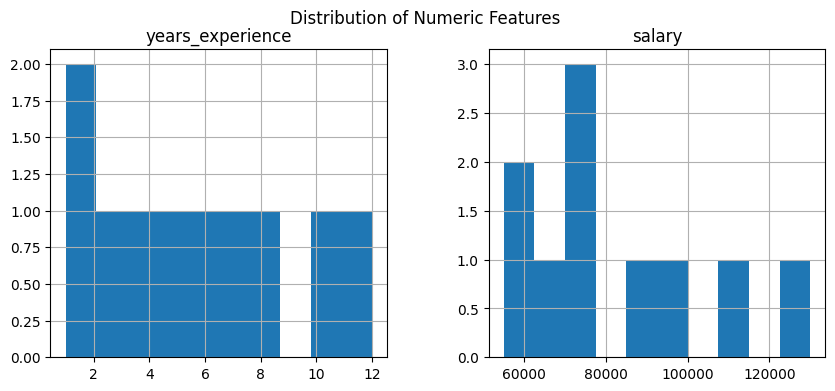

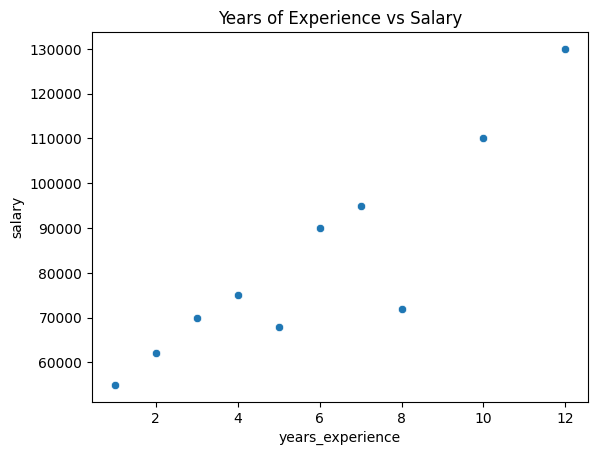

In [2]:
def load_data(path: str) -> pd.DataFrame:
    """
    Load salary dataset from CSV.
    """
    return pd.read_csv(path)

def explore_data(df: pd.DataFrame):
    """
    Display dataset info, summary statistics, and visualizations.
    """
    print("Data Info:")
    print(df.info())
    
    print("\nDescriptive Statistics:")
    print(df.describe())

    # Distribution plots
    df[['years_experience', 'salary']].hist(bins=10, figsize=(10, 4))
    plt.suptitle("Distribution of Numeric Features")
    plt.show()

    # Scatter plot
    sns.scatterplot(x='years_experience', y='salary', data=df)
    plt.title("Years of Experience vs Salary")
    plt.show()

df = load_data("salary_dataset.csv")
explore_data(df)


# 3. Data Preparation

We check for missing values and prepare the dataset for modeling.

The dataset also includes categorical variables (`degree`, `bootcamp`), but because:
- we have **only 10 samples**, and  
- encoding these variables would add extra columns,

they could cause overfitting and unstable coefficient estimates.

Therefore, we use only `years_experience` to build a clean, interpretable regression model.


In [3]:
# Drop missing values if any
df = df.dropna()

# Select feature and target
X = df[['years_experience']]
y = df['salary']


# 4. Modeling

We train a linear regression model to predict salary using years of experience.


In [4]:
def train_model(X, y):
    """
    Train a Linear Regression model and return splits + model.
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model, X_train, X_test, y_train, y_test

model, X_train, X_test, y_train, y_test = train_model(X, y)


# 5. Evaluation

We evaluate model performance using R² score and Mean Squared Error (MSE).


In [5]:
def evaluate_model(model, X_test, y_test):
    """
    Print model performance metrics.
    """
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    print("R² Score:", r2)
    print("MSE:", mse)
    return r2, mse

r2, mse = evaluate_model(model, X_test, y_test)


R² Score: 0.9880825631018463
MSE: 6864443.653336514


# 6. Scenario Prediction & Interpretation

### **Scenario:**
A professional has **4.5 years of experience** and wants to estimate their expected salary.

We use the model to make a prediction.


In [6]:
def predict_salary(model, years: float) -> float:
    """
    Predict salary based on years of experience.
    """
    return model.predict(np.array([[years]]))[0]

pred_salary = predict_salary(model, 4.5)
pred_salary


/opt/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(74331.7610062893)

### Interpretation

The model predicts that a person with **4.5 years of experience** would earn approximately:

### **💲 \$74,331**

This aligns with the strong linear trend observed in the dataset.  
Because the dataset is small, the exact number should be treated as an estimate, but the overall pattern is reliable.
